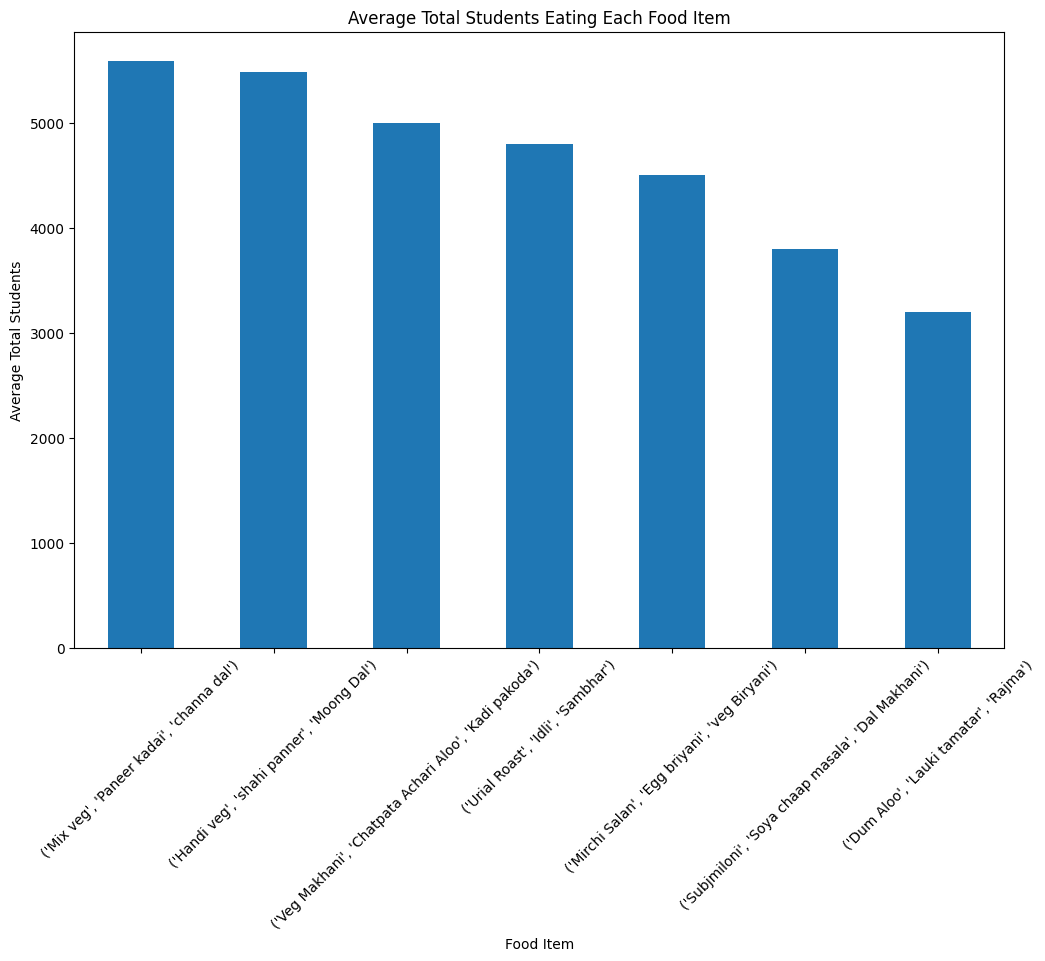

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the breakfast data from the CSV file
df = pd.read_csv('Lunch_1_data.csv')

# Group the data by food item and calculate the average total students
avg_students_per_food = df.groupby('Lunch')['Total Students'].mean().sort_values(ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 8))
avg_students_per_food.plot(kind='bar')
plt.title('Average Total Students Eating Each Food Item')
plt.xlabel('Food Item')
plt.ylabel('Average Total Students')
plt.xticks(rotation=45)
plt.show()

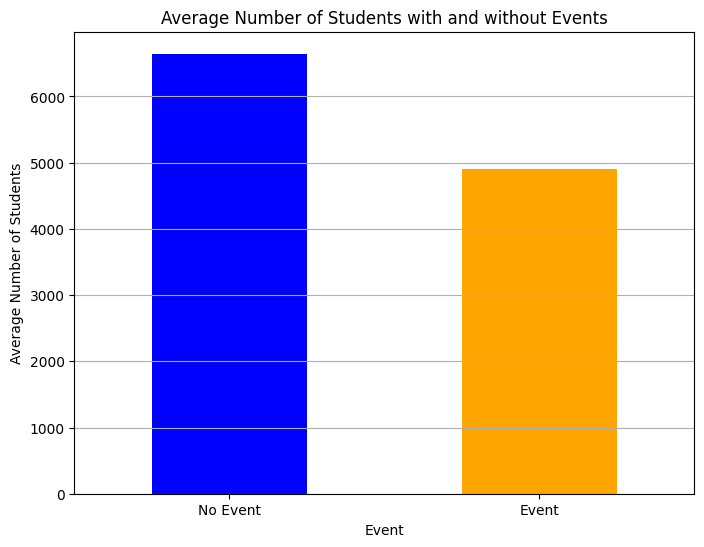

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the modified dinner data from the CSV file
df = pd.read_csv('Lunch_Event_Dataset.csv')

# Group the data by the 'Event' column and calculate the average number of students
avg_students_by_event = df.groupby('Event')['Total Students'].mean()

# Plotting the graph
plt.figure(figsize=(8, 6))
avg_students_by_event.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Number of Students with and without Events')
plt.xlabel('Event')
plt.ylabel('Average Number of Students')
plt.xticks([0, 1], ['No Event', 'Event'], rotation=0)
plt.grid(axis='y')
plt.show()


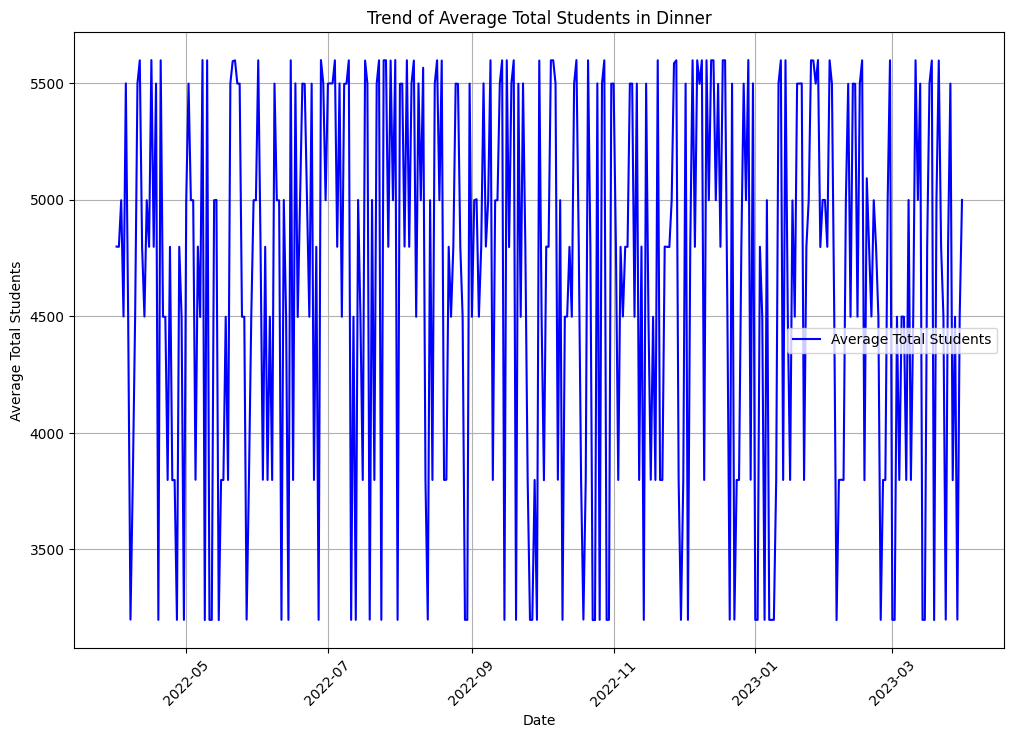

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the breakfast data from the CSV file
df = pd.read_csv('Lunch_1_data.csv')

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by date and calculate the average total students and counts of each food item in each phase
avg_total_students = df.groupby('Date')['Total Students'].mean().reset_index()
phase_counts = df.groupby(['Date', 'Lunch'])[['Plates in Phase 1', 'Plates in Phase 2', 'Plates in Phase 3', 'Plates in Phase 4']].sum().reset_index()

# Plotting the trend of average total students
plt.figure(figsize=(12, 8))
plt.plot(avg_total_students['Date'], avg_total_students['Total Students'], label='Average Total Students', color='blue')
plt.title('Trend of Average Total Students in Dinner')
plt.xlabel('Date')
plt.ylabel('Average Total Students')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dinner data from the CSV file
df = pd.read_csv('Lunch_1_data.csv')

# Feature Engineering: One-hot encode the dinner menu items
features = pd.get_dummies(df['Lunch'])

# Split the data into features (X) and target (y)
X = features
y = df[['Plates in Phase 1', 'Plates in Phase 2', 'Plates in Phase 3', 'Plates in Phase 4']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Predict the number of students for each food item in each phase
food_items = features.columns
predictions = {}

for food_item in food_items:
    new_menu_items = pd.DataFrame({'Dinner': [food_item]})
    new_features = pd.get_dummies(new_menu_items['Dinner'], columns=features.columns)

    # Add dummy columns for any missing menu items
    missing_cols = set(features.columns) - set(new_features.columns)
    for col in missing_cols:
        new_features[col] = 0

    # Reorder columns to match the order during training
    new_features = new_features[features.columns]

    # Predict
    prediction = model.predict(new_features)[0]
    predictions[food_item] = prediction

# Output predictions
for food_item, prediction in predictions.items():
    print(f'{food_item}: {prediction}')


Mean Squared Error: 31313.133561643834
('Dum Aloo', 'Lauki tamatar', 'Rajma'): [ 226. 1168. 1040.  768.]
('Handi veg', 'shahi panner', 'Moong Dal'): [ 439. 1936. 1750. 1352.]
('Mirchi Salan', 'Egg briyani', 'veg Biryani'): [ 363. 1592. 1460. 1084.]
('Mix veg', 'Paneer kadai', 'channa dal'): [ 375. 1992. 1802. 1420.]
('Subjmiloni', 'Soya chaap masala', 'Dal Makhani'): [ 249. 1400. 1220.  932.]
('Urial Roast', 'Idli', 'Sambhar'): [ 318. 1744. 1556. 1180.]
('Veg Makhani', 'Chatpata Achari Aloo', 'Kadi pakoda'): [ 416. 1848. 1584. 1156.]
